In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import en_core_web_sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt  
#from pandas_profiling import ProfileReport   
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.naive_bayes import GaussianNB  
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [59]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
profile= ProfileReport(df, title='Sentiment Analysis', html={'style':{'full_width': True}})

NameError: name 'ProfileReport' is not defined

In [ ]:
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:397: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


In [ ]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

## Data preprocessing and cleaning 

In [60]:
df.drop(['Age','Clothing ID', 'Division Name', 'Department Name', 'Class Name'], axis = 1, inplace=True)
df.reset_index(inplace=True)
df.drop(['Unnamed: 0'],axis = 1, inplace=True)
df.set_index('index')
index_names = df[df['Review Text'].isnull() & df['Title'].isnull()].index 
df.drop(index_names, inplace = True) 
df[df['Review Text'].isnull() & df['Title'].isnull()].sum(axis=0)
df['Review Text'].isnull().sum(axis = 0)
idx=df[df['Review Text'].isnull()].index
df['Title'].isnull().sum(axis = 0)
df['Review Text'][idx]
df['Title'][idx]
df['Review Text'][idx]=df['Title'][idx]
df['Review Text'][idx]
df.drop(['Title'],axis = 1, inplace=True)

<ipython-input-60-f02947f230e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Text'][idx]=df['Title'][idx]


In [63]:
df.head(7)

index                                        Review Text  Rating  \
0      0  Absolutely wonderful - silky and sexy and comf...       4   
1      1  Love this dress!  it's sooo pretty.  i happene...       5   
2      2  I had such high hopes for this dress and reall...       3   
3      3  I love, love, love this jumpsuit. it's fun, fl...       5   
4      4  This shirt is very flattering to all due to th...       5   
5      5  I love tracy reese dresses, but this one is no...       2   
6      6  I aded this in my basket at hte last mintue to...       5   

   Recommended IND  Positive Feedback Count  
0                1                        0  
1                1                        4  
2                0                        0  
3                1                        0  
4                1                        6  
5                0                        4  
6                1                        1

## Word Cloud

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
txt=''.join(df['Review Text'])
wc=WordCloud(width=1200, height=800).generate(txt)

ModuleNotFoundError: No module named 'wordcloud'

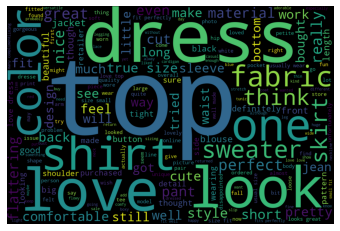

In [ ]:
plt.imshow(wc)
plt.axis('off')
plt.show()

## Text Preprocessing

In [64]:
import unicodedata
def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    

    return str(text)

df['Review Text Precrocessed']=df['Review Text'].apply(lambda x: strip_accents(x))

#df.head(10)

In [65]:
def char_count(x):
    s=x.split()
    s=str(s)
    x=' '.join(s)
    return len(x)

df['Char_Count']=df['Review Text Precrocessed'].apply(lambda x: char_count(x.encode('utf-8')))

In [66]:
def word_count(x):
    return len(str(x).split())

df['Word_Count']=df['Review Text Precrocessed'].apply(lambda x: word_count(x.encode('utf-8')))

In [67]:
df.head(8)

index                                        Review Text  Rating  \
0      0  Absolutely wonderful - silky and sexy and comf...       4   
1      1  Love this dress!  it's sooo pretty.  i happene...       5   
2      2  I had such high hopes for this dress and reall...       3   
3      3  I love, love, love this jumpsuit. it's fun, fl...       5   
4      4  This shirt is very flattering to all due to th...       5   
5      5  I love tracy reese dresses, but this one is no...       2   
6      6  I aded this in my basket at hte last mintue to...       5   
7      7  I ordered this in carbon for store pick up, an...       4   

   Recommended IND  Positive Feedback Count  \
0                1                        0   
1                1                        4   
2                0                        0   
3                1                        0   
4                1                        6   
5                0                        4   
6                1                        1   
7                1                        4   

                            Review Text Precrocessed  Char_Count  Word_Count  
0  Absolutely wonderful - silky and sexy and comf...         171           8  
1  Love this dress!  it's sooo pretty.  i happene...        1095          62  
2  I had such high hopes for this dress and reall...        1785          98  
3  I love, love, love this jumpsuit. it's fun, fl...         425          22  
4  This shirt is very flattering to all due to th...         673          36  
5  I love tracy reese dresses, but this one is no...        1761          98  
6  I aded this in my basket at hte last mintue to...        1801         101  
7  I ordered this in carbon for store pick up, an...        1741          97

In [10]:
print(df['Word_Count'].max())
print(df['Word_Count'].min())

115
2


In [68]:
def remove_sapce(x):
    x=' '.join(x.split())
    return x
df['Review Text Precrocessed']=df['Review Text Precrocessed'].apply(lambda x: remove_sapce(x))

In [69]:
df['Review Text Precrocessed']=df['Review Text Precrocessed'].str.lower()

In [70]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"i'm": "i am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

for key, value in contractions.items():
  key= key.lower()
  value=value.lower()
  # print(key)
  # print(value)


def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
        return x
    return x
df['Review Text Precrocessed']=df['Review Text Precrocessed'].apply(lambda x: cont_to_exp(x))


In [71]:
df.head(5)

index                                        Review Text  Rating  \
0      0  Absolutely wonderful - silky and sexy and comf...       4   
1      1  Love this dress!  it's sooo pretty.  i happene...       5   
2      2  I had such high hopes for this dress and reall...       3   
3      3  I love, love, love this jumpsuit. it's fun, fl...       5   
4      4  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count  \
0                1                        0   
1                1                        4   
2                0                        0   
3                1                        0   
4                1                        6   

                            Review Text Precrocessed  Char_Count  Word_Count  
0  absolutely wonderful - silky and sexy and comf...         171           8  
1  love this dress! it is sooo pretty. i happened...        1095          62  
2  i had such high hopes for this dress and reall...        1785          98  
3  i love, love, love this jumpsuit. it is fun, f...         425          22  
4  this shirt is very flattering to all due to th...         673          36

In [ ]:
# nlp = spacy.load('en_core_web_sm')
# from spacy.lang.en.stop_words import STOP_WORDS
# print(STOP_WORDS)



# x='except is stop word'
# def remove_stop_words(x):
#     x=' '.join([t for t in x.split() if t not in STOP_WORDS])
#     #print(x)
#     return x
# remove_stop_words(x)
# df['Review Text Precrocessed']=df['Review Text Precrocessed'].apply(lambda x: remove_stop_words(x))


{'see', 'eight', 'seem', 'sometime', 'what', 'somewhere', 'mostly', 'before', 'yourselves', 'further', 'along', 'also', 'because', 'ever', 'towards', 'upon', '’d', 'could', 'may', '’ll', 'many', 'of', 'whatever', 'some', 'under', 'perhaps', '‘ve', 'her', 'used', 'very', 'next', 'it', 'through', 'whom', 'yours', 'various', 'within', 'once', 'then', 'none', 'would', 'i', 'out', 'against', 'nevertheless', 'everyone', 'three', 'somehow', 'and', 'six', 'than', 'whither', 'anyone', 'formerly', 'have', 'bottom', 'afterwards', 'you', 'beside', 'former', 'were', 'with', 'nowhere', 'besides', 'themselves', '’ve', "'re", 'everywhere', 'being', 'n‘t', 'unless', 'during', 'but', 'down', 'ours', 'name', 'where', 'amount', 'had', 'rather', 'himself', 'make', 'his', 'due', 'ca', 'hereupon', 'latter', 'own', 'still', 'cannot', 'them', "'d", 'put', 'my', 'they', 'until', '’m', 'been', 'using', 'others', 'yourself', 'whether', 'after', 'might', 'one', 'a', 'ten', 'here', 'nine', 'empty', 'other', 'say', 

In [16]:
## Spelling correction


from textblob import TextBlob
x='thnks for wathing'
x=TextBlob(x).correct()
x


df['Review Text Precrocessed']=df['Review Text Precrocessed'].apply(lambda x: TextBlob(str(x)).correct())
df.head(20)

index                                        Review Text  Rating  \
0       0  Absolutely wonderful - silky and sexy and comf...       4   
1       1  Love this dress!  it's sooo pretty.  i happene...       5   
2       2  I had such high hopes for this dress and reall...       3   
3       3  I love, love, love this jumpsuit. it's fun, fl...       5   
4       4  This shirt is very flattering to all due to th...       5   
5       5  I love tracy reese dresses, but this one is no...       2   
6       6  I aded this in my basket at hte last mintue to...       5   
7       7  I ordered this in carbon for store pick up, an...       4   
8       8  I love this dress. i usually get an xs but it ...       5   
9       9  I'm 5"5' and 125 lbs. i ordered the s petite t...       5   
10     10  Dress runs small esp where the zipper area run...       3   
11     11  This dress is perfection! so pretty and flatte...       5   
12     12  More and more i find myself reliant on the rev...       5   
13     13  Bought the black xs to go under the larkspur m...       5   
14     14  This is a nice choice for holiday gatherings. ...       3   
15     15  I took these out of the package and wanted the...       4   
16     16  Material and color is nice.  the leg opening i...       3   
17     17  Took a chance on this blouse and so glad i did...       5   
18     18  A flattering, super cozy coat.  will work well...       5   
19     19  I love the look and feel of this tulle dress. ...       5   

    Recommended IND  Positive Feedback Count  \
0                 1                        0   
1                 1                        4   
2                 0                        0   
3                 1                        0   
4                 1                        6   
5                 0                        4   
6                 1                        1   
7                 1                        4   
8                 1                        0   
9                 1                        0   
10                0                       14   
11                1                        2   
12                1                        2   
13                1                        0   
14                1                        1   
15                1                        3   
16                1                        2   
17                1                        0   
18                1                        0   
19                1                        0   

                             Review Text Precrocessed  Char_Count  Word_Count  
0   (a, b, s, o, l, u, t, e, l, y,  , w, o, n, d, ...         171           8  
1   (l, o, v, e,  , t, h, i, s,  , d, r, e, s, s, ...        1095          62  
2   (i,  , h, a, d,  , s, u, c, h,  , h, i, g, h, ...        1785          98  
3   (i,  , l, o, v, e, ,,  , l, o, v, e, ,,  , l, ...         425          22  
4   (t, h, i, s,  , s, h, i, r, t,  , i, s,  , v, ...         673          36  
5   (i,  , l, o, v, e,  , t, r, a, c, e,  , g, e, ...        1761          98  
6   (i,  , a, d, d, e, d,  , t, h, i, s,  , i, n, ...        1801         101  
7   (i,  , o, r, d, e, r, e, d,  , t, h, i, s,  , ...        1741          97  
8   (i,  , l, o, v, e,  , t, h, i, s,  , d, r, e, ...         605          34  
9   (i,  , a, m,  , 5, ", 5, ',  , a, n, d,  , 1, ...        1299          72  
10  (d, r, e, s, s,  , r, u, n, s,  , s, m, a, l, ...        1201          66  
11  (t, h, i, s,  , d, r, e, s, s,  , i, s,  , p, ...         167           8  
12  (m, o, r, e,  , a, n, d,  , m, o, r, e,  , i, ...        1733          91  
13  (b, o, u, g, h, t,  , t, h, e,  , b, l, a, c, ...        1303          66  
14  (t, h, i, s,  , i, s,  , a,  , n, i, c, e,  , ...        1769          96  
15  (i,  , t, o, o, k,  , t, h, e, s, e,  , o, u, ...        1701          95  
16  (m, a, t, e, r, i, a, l,  , a, n, d,  , c, o, ...        1295          73  
17  (t, o, o, k,  , a,  , c, h, a, n, c, e

In [35]:
## punctuation removal

import re
x='So am I.'
re.sub(r'[^\w]+', " ", x)

'So am I '

## Negative and Positive rating analysis

In [ ]:
df[df['Rating']>3].count()

index                       17449
Review Text                 17449
Rating                      17449
Recommended IND             17449
Positive Feedback Count     17449
Review Text Precrocessed    17449
Char_Count                  17449
dtype: int64

In [ ]:
df[df['Rating']<=3].count()

index                       5193
Review Text                 5193
Rating                      5193
Recommended IND             5193
Positive Feedback Count     5193
Review Text Precrocessed    5193
Char_Count                  5193
dtype: int64

In [15]:
#negative sentiment indices
neg=[]
neg.append(df[df['Rating']<=3].index)
neg

[Int64Index([    2,     5,    10,    14,    16,    22,    23,    25,    26,
                33,
             ...
             23449, 23450, 23452, 23460, 23462, 23475, 23478, 23482, 23483,
             23484],
            dtype='int64', length=5193)]

In [16]:

#positive sentiment indices
pos=[]
pos.append(df[df['Rating']>3].index)

In [17]:
df[df['Positive Feedback Count']==0].count()

index                       10332
Review Text                 10332
Rating                      10332
Recommended IND             10332
Positive Feedback Count     10332
Review Text Precrocessed    10332
Char_Count                  10332
Word_Count                  10332
dtype: int64

In [18]:
df[df['Positive Feedback Count']>3].count()

index                       4641
Review Text                 4641
Rating                      4641
Recommended IND             4641
Positive Feedback Count     4641
Review Text Precrocessed    4641
Char_Count                  4641
Word_Count                  4641
dtype: int64

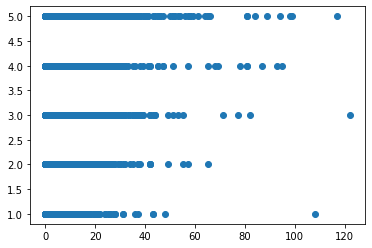

In [19]:
scatterplot= plt.scatter(x='Positive Feedback Count', y= 'Rating', cmap='coolwarm', data=df)

In [20]:
df['Not_Recommended_rating']=df.loc[df['Recommended IND'] == 0, 'Rating']

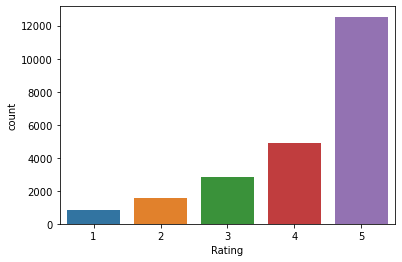

In [21]:
sns.countplot(x='Rating',data=df)

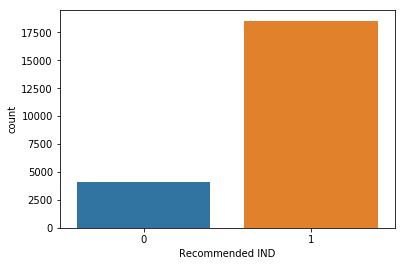

In [ ]:
sns.countplot(x='Recommended IND',data=df)

In [ ]:
cor= df.corr(method='pearson')
print(cor)

                            index    Rating  ...  Char_Count  Word_Count
index                    1.000000 -0.003090  ...    0.010506    0.009721
Rating                  -0.003090  1.000000  ...   -0.056930   -0.057743
Recommended IND         -0.004825  0.792570  ...   -0.030860   -0.030171
Positive Feedback Count -0.002855 -0.060998  ...    0.190000    0.185918
Char_Count               0.010506 -0.056930  ...    1.000000    0.997088
Word_Count               0.009721 -0.057743  ...    0.997088    1.000000

[6 rows x 6 columns]


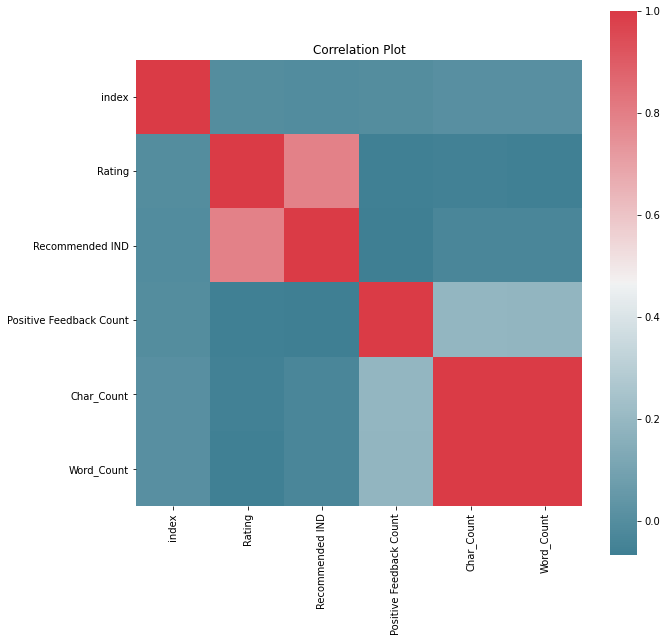

In [ ]:
fig, ax =plt.subplots(figsize=(10, 10))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

## Tokennization

In [36]:
from textblob import TextBlob
df['Tokens']=df['Review Text Precrocessed'].apply(lambda x: TextBlob(str(x)).words)


**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt/english.pickle

  Searched in:
    - 'C:\\Users\\Soumr/nltk_data'
    - 'C:\\Users\\Soumr\\anaconda3\\nltk_data'
    - 'C:\\Users\\Soumr\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Soumr\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Soumr\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [19]:
df.head(10)

index                                        Review Text  Rating  \
0      0  Absolutely wonderful - silky and sexy and comf...       4   
1      1  Love this dress!  it's sooo pretty.  i happene...       5   
2      2  I had such high hopes for this dress and reall...       3   
3      3  I love, love, love this jumpsuit. it's fun, fl...       5   
4      4  This shirt is very flattering to all due to th...       5   
5      5  I love tracy reese dresses, but this one is no...       2   
6      6  I aded this in my basket at hte last mintue to...       5   
7      7  I ordered this in carbon for store pick up, an...       4   
8      8  I love this dress. i usually get an xs but it ...       5   
9      9  I'm 5"5' and 125 lbs. i ordered the s petite t...       5   

   Recommended IND  Positive Feedback Count  \
0                1                        0   
1                1                        4   
2                0                        0   
3                1                        0   
4                1                        6   
5                0                        4   
6                1                        1   
7                1                        4   
8                1                        0   
9                1                        0   

                            Review Text Precrocessed  Char_Count  Word_Count  
0  (a, b, s, o, l, u, t, e, l, y,  , w, o, n, d, ...         171           8  
1  (l, o, v, e,  , t, h, i, s,  , d, r, e, s, s, ...        1095          62  
2  (i,  , h, a, d,  , s, u, c, h,  , h, i, g, h, ...        1785          98  
3  (i,  , l, o, v, e, ,,  , l, o, v, e, ,,  , l, ...         425          22  
4  (t, h, i, s,  , s, h, i, r, t,  , i, s,  , v, ...         673          36  
5  (i,  , l, o, v, e,  , t, r, a, c, e,  , g, e, ...        1761          98  
6  (i,  , a, d, d, e, d,  , t, h, i, s,  , i, n, ...        1801         101  
7  (i,  , o, r, d, e, r, e, d,  , t, h, i, s,  , ...        1741          97  
8  (i,  , l, o, v, e,  , t, h, i, s,  , d, r, e, ...         605          34  
9  (i,  , a, m,  , 5, ", 5, ',  , a, n, d,  , 1, ...        1299          72

In [ ]:
# import spacy
# import en_core_web_sm
# from __future__ import unicode_literals
# #x="and I love the game"
# nlp = spacy.load('en_core_web_sm')


# def get_token(x):
#     #x=x.encode('utf-16')
#     doc=nlp(x)
#     for token in doc:
#         #print(token.text)
#         return token.text
    
# get_token(x)   
    
# df['Tokens_Scapy']=df['Review Text Precrocessed'].apply(lambda x: get_token(x))
# df.head(10)

## Lemmetization

In [20]:
import spacy
import en_core_web_sm
from __future__ import unicode_literals
#x="and I love the game"
nlp = spacy.load('en_core_web_sm')
def make_to_base(x):
    x_list=[]
    doc=nlp(x)
    for token in doc:
        lemma=token.lemma_
        if lemma=='_PRON_' or lemma=='be': 
            lemma=token.text
        x_list.append(lemma)
    return ' '.join(x_list)

df['Lemma']=df['Review Text Precrocessed'].apply(lambda x: make_to_base(x.decode("utf-8")))
df.head(10)

AttributeError: 'TextBlob' object has no attribute 'decode'

In [25]:
df.head(10)

index                                        Review Text  Rating  \
0      0  Absolutely wonderful - silky and sexy and comf...       4   
1      1  Love this dress!  it's sooo pretty.  i happene...       5   
2      2  I had such high hopes for this dress and reall...       3   
3      3  I love, love, love this jumpsuit. it's fun, fl...       5   
4      4  This shirt is very flattering to all due to th...       5   
5      5  I love tracy reese dresses, but this one is no...       2   
6      6  I aded this in my basket at hte last mintue to...       5   
7      7  I ordered this in carbon for store pick up, an...       4   
8      8  I love this dress. i usually get an xs but it ...       5   
9      9  I'm 5"5' and 125 lbs. i ordered the s petite t...       5   

   Recommended IND  Positive Feedback Count  \
0                1                        0   
1                1                        4   
2                0                        0   
3                1                        0   
4                1                        6   
5                0                        4   
6                1                        1   
7                1                        4   
8                1                        0   
9                1                        0   

                            Review Text Precrocessed  Char_Count  Word_Count  \
0  absolutely wonderful - silky and sexy and comf...         171           8   
1  love this dress! it is sooo pretty. i happened...        1095          62   
2  i had such high hopes for this dress and reall...        1785          98   
3  i love, love, love this jumpsuit. it is fun, f...         425          22   
4  this shirt is very flattering to all due to th...         673          36   
5  i love tracy reese dresses, but this one is no...        1761          98   
6  i aded this in my basket at hte last mintue to...        1801         101   
7  i ordered this in carbon for store pick up, an...        1741          97   
8  i love this dress. i usually get an xs but it ...         605          34   
9  i am 5"5' and 125 lbs. i ordered the s petite ...        1299          72   

   Not_Recommended_rating  
0                     NaN  
1                     NaN  
2                     3.0  
3                     NaN  
4                     NaN  
5                     2.0  
6                     NaN  
7                     NaN  
8                     NaN  
9                     NaN

## TF IDF manual calculation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from __future__ import unicode_literals

In [ ]:
x = ['which book is this', 'this is book and this is math']

In [ ]:
cv=CountVectorizer()
count=cv.fit_transform(x)

In [ ]:
#bagofwords
count.toarray()

array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]])

In [ ]:
bow=pd.DataFrame(count.toarray(), columns=cv.get_feature_names())

In [ ]:
bow

and  book  is  math  this  which
0    0     1   1     0     1      1
1    1     1   2     1     2      0

In [ ]:
bb = bow.astype('bool')

In [ ]:
bow.shape

(2, 6)

In [ ]:
for index, row in enumerate(bow.iterrows()):
    print(row[1])
    print()

and      0
book     1
is       1
math     0
this     1
which    1
Name: 0, dtype: int64
()
and      1
book     1
is       2
math     1
this     2
which    0
Name: 1, dtype: int64
()


In [ ]:
tf = bow.copy()
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = float(tf.loc[index, col]) / sum(row[1].values)

In [ ]:
tf

and      book        is      math      this  which
0  0.000000  0.250000  0.250000  0.000000  0.250000   0.25
1  0.142857  0.142857  0.285714  0.142857  0.285714   0.00

In [ ]:
bb = bow.astype('bool')
bb

and  book    is   math  this  which
0  False  True  True  False  True   True
1   True  True  True   True  True  False

In [ ]:
nz = []
for col in cols:
    nz.append(bb[col].sum())
nz

[1, 2, 2, 1, 2, 1]

## Sentiment Prediction with TextBlob

In [26]:
from textblob import TextBlob
x="This product is very bad"
from textblob.sentiments import NaiveBayesAnalyzer
tb= TextBlob(x, analyzer=NaiveBayesAnalyzer())
tb.sentiment


**********************************************************************
  Resource movie_reviews not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('movie_reviews')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/movie_reviews

  Searched in:
    - 'C:\\Users\\Soumr/nltk_data'
    - 'C:\\Users\\Soumr\\anaconda3\\nltk_data'
    - 'C:\\Users\\Soumr\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Soumr\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Soumr\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


### Only two classes

In [15]:
def la(x):
    if(x>3):
        return 1
    else:
        return 0

In [16]:
df['Label']=df['Rating'].apply(lambda x:la(x))



In [17]:
Positive_review_1=[]
Negative_review_1=[]
Positive_review_1=df[df['Label']==1]
Negative_review_1=df[df['Label']==0]

In [18]:
Positive_review_1.shape

(17449, 9)

In [19]:
Negative_review_1.shape

(5193, 9)

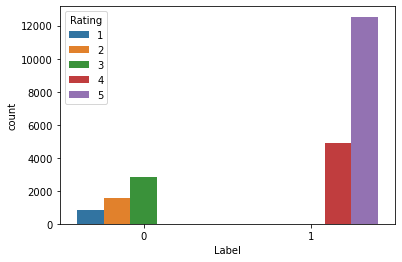

In [32]:
# import matplotlib.pyplot as plt
# plt.hist(Positive_review_1['Rating'], bins=200, label='Positive')
# plt.hist(Negative_review_1['Rating'], bins=200, label='Negative')
# plt.legend()
# plt.show()

sns.countplot(x='Label', hue='Rating', data=df)

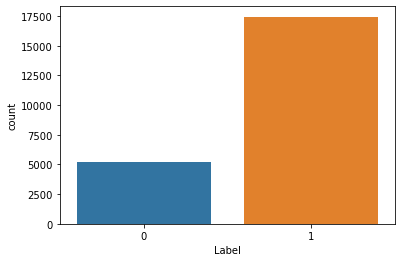

In [33]:
sns.countplot(x='Label',data=df)

### Three classes

In [21]:
def label(x):
    if(x>3):
        return 1
    elif(x==3):
        return 2
    else:
        return 0

In [22]:
df['Label_3C']=df['Rating'].apply(lambda x:label(x))


In [23]:
Positive_review=[]
Negative_review=[]
Neutral_review=[]
Positive_review=df[df['Label_3C']==1]
Negative_review=df[df['Label_3C']==0]
Neutral_review=df[df['Label_3C']==2]

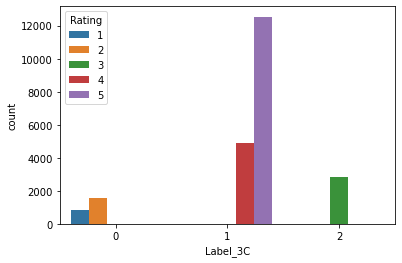

In [24]:
# import matplotlib.pyplot as plt
# plt.hist(Positive_review['Rating'], bins=100, alpha=0.7, label='Positive')
# plt.hist(Negative_review['Rating'], bins=100, alpha=0.7, label='Negative')
# plt.hist(Neutral_review['Rating'], bins=100, alpha=0.7, label='Neutral')
# plt.legend()
# plt.show()

sns.countplot(x='Label_3C', hue='Rating', data=df)

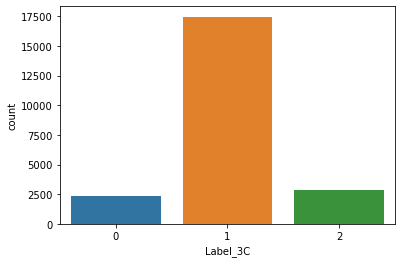

In [34]:
sns.countplot(x='Label_3C',data=df)

In [68]:
def lab(x):
    if(x>3):
        return "Positive"
    elif(x<3):
        return "Negative"
    else:
        return "Netural"

In [33]:
df['label_class']=df['Rating'].apply(lambda x:lab(x))

NameError: name 'lab' is not defined

In [26]:
df.head()

index                                        Review Text  Rating  \
0      0  Absolutely wonderful - silky and sexy and comf...       4   
1      1  Love this dress!  it's sooo pretty.  i happene...       5   
2      2  I had such high hopes for this dress and reall...       3   
3      3  I love, love, love this jumpsuit. it's fun, fl...       5   
4      4  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count  \
0                1                        0   
1                1                        4   
2                0                        0   
3                1                        0   
4                1                        6   

                            Review Text Precrocessed  Char_Count  Word_Count  \
0  (a, b, s, o, l, u, t, e, l, y,  , w, o, n, d, ...         171           8   
1  (l, o, v, e,  , t, h, i, s,  , d, r, e, s, s, ...        1095          62   
2  (i,  , h, a, d,  , s, u, c, h,  , h, i, g, h, ...        1785          98   
3  (i,  , l, o, v, e, ,,  , l, o, v, e, ,,  , l, ...         425          22   
4  (t, h, i, s,  , s, h, i, r, t,  , i, s,  , v, ...         673          36   

   Label_3C  
0         1  
1         1  
2         2  
3         1  
4         1

## Add Labels

# **Two** **Classes**

In [ ]:
def la(x):
    if(x>3):
        return 1
    else:
        return 0

In [ ]:
df['Label']=df['Rating'].apply(lambda x:la(x))


In [ ]:
Positive_review_1=[]
Negative_review_1=[]
Positive_review_1=df[df['Label']==1]
Negative_review_1=df[df['Label']==0]

In [ ]:
Positive_review_1.shape

(17449, 11)

In [ ]:
Negative_review_1.shape

(5193, 11)

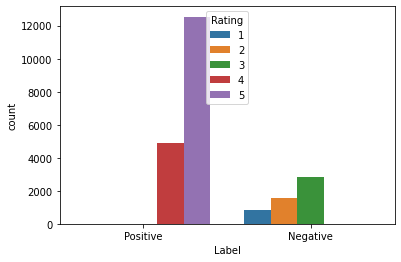

In [ ]:
# import matplotlib.pyplot as plt
# plt.hist(Positive_review_1['Rating'], bins=200, label='Positive')
# plt.hist(Negative_review_1['Rating'], bins=200, label='Negative')
# plt.legend()
# plt.show()

sns.countplot(x='Label', hue='Rating', data=df)

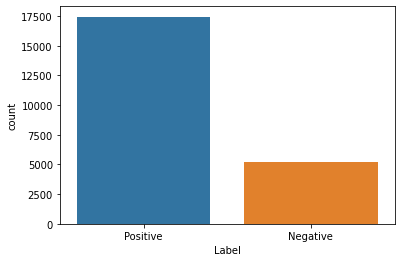

In [ ]:
sns.countplot(x='Label',data=df)

In [ ]:
df.groupby('Label').count()

index  Review Text  Rating  ...  Word_Count  Label_3C  label_class
Label                              ...                                   
0       5193         5193    5193  ...        5193      5193         5193
1      17449        17449   17449  ...       17449     17449        17449

[2 rows x 10 columns]

# **Three Classes**

In [72]:
def label(x):
    if(x>3):
        return 'Positive'
    elif(x==3):
        return 'Neutral'
    else:
        return 'Negative'

In [73]:
df['Label_3C']=df['Rating'].apply(lambda x:label(x))


In [74]:
Positive_review=[]
Negative_review=[]
Neutral_review=[]
Positive_review=df[df['Label_3C']=='Positive']
Negative_review=df[df['Label_3C']=='Negative']
Neutral_review=df[df['Label_3C']=='Neutral']

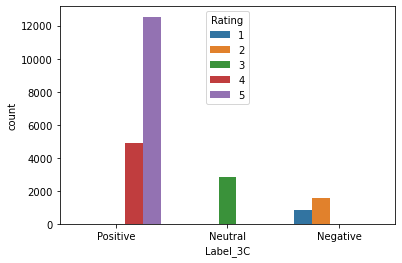

In [75]:
# import matplotlib.pyplot as plt
# plt.hist(Positive_review['Rating'], bins=100, alpha=0.7, label='Positive')
# plt.hist(Negative_review['Rating'], bins=100, alpha=0.7, label='Negative')
# plt.hist(Neutral_review['Rating'], bins=100, alpha=0.7, label='Neutral')
# plt.legend()
# plt.show()

sns.countplot(x='Label_3C', hue='Rating', data=df)

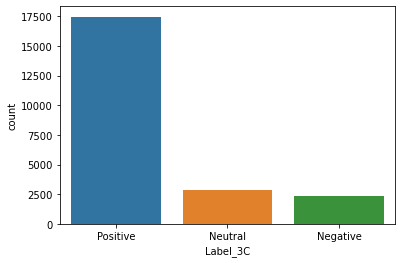

In [76]:
sns.countplot(x='Label_3C',data=df)

In [77]:
df.groupby('Label_3C').count()

index  Review Text  Rating  Recommended IND  \
Label_3C                                                
Negative   2370         2370    2370             2370   
Neutral    2823         2823    2823             2823   
Positive  17449        17449   17449            17449   

          Positive Feedback Count  Review Text Precrocessed  Char_Count  \
Label_3C                                                                  
Negative                     2370                      2370        2370   
Neutral                      2823                      2823        2823   
Positive                    17449                     17449       17449   

          Word_Count  
Label_3C              
Negative        2370  
Neutral         2823  
Positive       17449

## Balancing Data for Two Classes

In [ ]:
neg= Negative_review_1

In [ ]:
pos=Positive_review_1.sample(Negative_review_1.shape[0])

In [ ]:
neg.shape

(5193, 10)

In [ ]:
pos.shape

(5193, 10)

In [ ]:
data=pos.append(neg, ignore_index=True)
data.sample(5)

index                                        Review Text  Rating  \
4967   7447  I have been living in mine since i bought it! ...       5   
6104   4126  Scratchy, wide cut = not flattering, i tried t...       3   
7822  11954  This is more of an undershirt than a shirt. th...       1   
8561  15275  This is a comfortable tunic piece with ample r...       3   
7317   9628  This top is absolutely gorgeous, but i followe...       2   

      Recommended IND  Positive Feedback Count  \
4967                1                        1   
6104                1                        0   
7822                0                        1   
8561                0                        2   
7317                0                        6   

                               Review Text Precrocessed  Char_Count  \
4967  ben living bought it! comfy dresier plain swea...          92   
6104  scratchy, wide cut = flatering, tried work wan...         237   
7822  undershirt shirt. material thin shows everythi...         186   
8561  comfortable tunic piece ample rear coverage. l...         327   
7317  absolutely gorgeous, folowed care tag t comple...         128   

      Not_Recommended_rating  \
4967                     NaN   
6104                     NaN   
7822                     1.0   
8561                     3.0   
7317                     2.0   

                                                 Tokens  Label  
4967  [ben, living, bought, it, comfy, dresier, plai...      1  
6104  [scratchy, wide, cut, flatering, tried, work, ...      0  
7822  [undershirt, shirt, material, thin, shows, eve...      0  
8561  [comfortable, tunic, piece, ample, rear, cover...      0  
7317  [absolutely, gorgeous, folowed, care, tag, t, ...      0

In [32]:
data['Review Text Precrocessed']

NameError: name 'data' is not defined

In [ ]:
data['Label'].value_counts()

1    5193
0    5193
Name: Label, dtype: int64

## Balancing Data for Three Classes

In [ ]:
neg_3_class = Negative_review

In [ ]:
neutral_3_class = Neutral_review.sample(Negative_review.shape[0])

In [ ]:
pos_3_class = Positive_review.sample(Negative_review.shape[0])

In [ ]:
data_3_class = pos_3_class.append(neg_3_class, ignore_index=True)
data_3_class.sample(5)

index                                        Review Text  Rating  \
815    5193  I love this dress so much...what an excellent ...       5   
3917  15587  The model must have this sweater pinned at the...       2   
2107    667  Great swimsuit, love the fabric and pattern. t...       4   
4138  17626  Looks like a pregnancy top. a lot gathers in f...       2   
764   18662  I tried this on in the store to see if it woul...       4   

      Recommended IND  Positive Feedback Count  \
815                 1                        0   
3917                0                        0   
2107                1                        0   
4138                0                        0   
764                 1                        0   

                               Review Text Precrocessed  Char_Count  \
815   love dres much...what excelent purchase! wear ...         378   
3917  model sweater pined back. sweater color true m...         414   
2107  great swimsuit, love fabric patern. lacks suport.          67   
4138  loks like pregnancy top. lot gathers back. ade...         267   
764   tried store se party splurge season. love colo...         297   

      Not_Recommended_rating  \
815                      NaN   
3917                     2.0   
2107                     NaN   
4138                     2.0   
764                      NaN   

                                                 Tokens  Label  Label_3C  
815   [love, dres, much, what, excelent, purchase, w...      1         1  
3917  [model, sweater, pined, back, sweater, color, ...      0         0  
2107  [great, swimsuit, love, fabric, patern, lacks,...      1         1  
4138  [loks, like, pregnancy, top, lot, gathers, bac...      0         0  
764   [tried, store, se, party, splurge, season, lov...      1         1

In [ ]:
data_3_class = data_3_class.append(neutral_3_class, ignore_index=True)
data_3_class.sample(5)

index                                        Review Text  Rating  \
4462  20566  Oh dear. the elastic waistband just ruined thi...       2   
6545  18260  This top came down to my hip bones, but i am s...       3   
4130  17564  Dress is pretty, i was disappointed by the sli...       2   
5533  14415  This dress is very cute! i loved it. the quali...       3   
6112  10627  I wear a 32 and sometimes a 31 but i could bar...       3   

      Recommended IND  Positive Feedback Count  \
4462                0                        0   
6545                1                        0   
4130                0                        0   
5533                1                        0   
6112                1                        1   

                               Review Text Precrocessed  Char_Count  \
4462  oh dear. elastic waistband ruined skirt me--it...         349   
6545  came hip bones, short-waisted. shirt definitel...         500   
4130  dres prety, disapointed slip smal like previou...         238   
5533  dres cute! loved it. quality excelent. however...         343   
6112  wear 32 31 barely squeze 32. fabric thick lots...         239   

      Not_Recommended_rating  \
4462                     2.0   
6545                     NaN   
4130                     2.0   
5533                     NaN   
6112                     NaN   

                                                 Tokens  Label  Label_3C  
4462  [oh, dear, elastic, waistband, ruined, skirt, ...      0         0  
6545  [came, hip, bones, short-waisted, shirt, defin...      0         2  
4130  [dres, prety, disapointed, slip, smal, like, p...      0         0  
5533  [dres, cute, loved, it, quality, excelent, how...      0         2  
6112  [wear, 32, 31, barely, squeze, 32, fabric, thi...      0         2

In [ ]:
data_3_class['Label_3C'].value_counts()

2    2370
1    2370
0    2370
Name: Label_3C, dtype: int64

## Calculating TFIDF using sklearn

### Tfidf on preprocessed data

In [52]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words=stopwords)
X=tfidf.fit_transform(df['Review Text Precrocessed'])
# X=X.toarray()
X.shape
# type(X)


# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf=TfidfVectorizer(stop_words=stopwords)
# X=tfidf.fit_transform(df['Review Text Precrocessed'])

(22642, 14084)

In [54]:
X

<22642x14084 sparse matrix of type '<class 'numpy.float64'>'
	with 679382 stored elements in Compressed Sparse Row format>

### Tfidf on original data

In [37]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer()
# X_o=tfidf.fit_transform(df['Review Text'])
# X_o=X_o.toarray()
# X_o.shape


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words=stopwords)
X_o=tfidf.fit_transform(df['Review Text'])

In [39]:
df.head(10)


index                                        Review Text  Rating  \
0      0  Absolutely wonderful - silky and sexy and comf...       4   
1      1  Love this dress!  it's sooo pretty.  i happene...       5   
2      2  I had such high hopes for this dress and reall...       3   
3      3  I love, love, love this jumpsuit. it's fun, fl...       5   
4      4  This shirt is very flattering to all due to th...       5   
5      5  I love tracy reese dresses, but this one is no...       2   
6      6  I aded this in my basket at hte last mintue to...       5   
7      7  I ordered this in carbon for store pick up, an...       4   
8      8  I love this dress. i usually get an xs but it ...       5   
9      9  I'm 5"5' and 125 lbs. i ordered the s petite t...       5   

   Recommended IND  Positive Feedback Count  \
0                1                        0   
1                1                        4   
2                0                        0   
3                1                        0   
4                1                        6   
5                0                        4   
6                1                        1   
7                1                        4   
8                1                        0   
9                1                        0   

                            Review Text Precrocessed  Char_Count  Word_Count  \
0  absolutely wonderful - silky and sexy and comf...         171           8   
1  love this dress! it is sooo pretty. i happened...        1095          62   
2  i had such high hopes for this dress and reall...        1785          98   
3  i love, love, love this jumpsuit. it is fun, f...         425          22   
4  this shirt is very flattering to all due to th...         673          36   
5  i love tracy reese dresses, but this one is no...        1761          98   
6  i aded this in my basket at hte last mintue to...        1801         101   
7  i ordered this in carbon for store pick up, an...        1741          97   
8  i love this dress. i usually get an xs but it ...         605          34   
9  i am 5"5' and 125 lbs. i ordered the s petite ...        1299          72   

   Not_Recommended_rating  Label  
0                     NaN      1  
1                     NaN      1  
2                     3.0      0  
3                     NaN      1  
4                     NaN      1  
5                     2.0      0  
6                     NaN      1  
7                     NaN      1  
8                     NaN      1  
9                     NaN      1

## Splitting data

### Specify the Label and Features

In [24]:
y=df['Label']
X=X
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.20,random_state=101)

In [41]:
df['Label'].value_counts()

1    17449
0     5193
Name: Label, dtype: int64

## Build random Forest Classifier 

No handles with labels found to put in legend.


[[ 344  687]
 [  49 3449]]
              precision    recall  f1-score   support

           0       0.88      0.33      0.48      1031
           1       0.83      0.99      0.90      3498

    accuracy                           0.84      4529
   macro avg       0.85      0.66      0.69      4529
weighted avg       0.84      0.84      0.81      4529

0.837491720026496


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


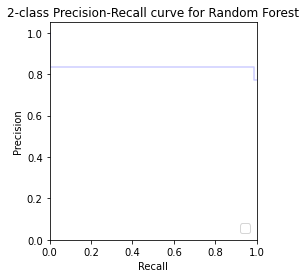

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


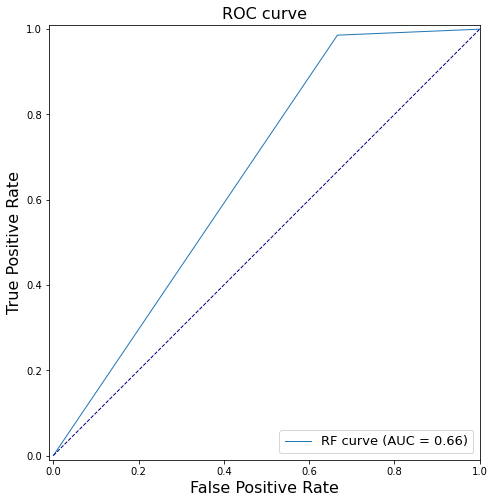

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))



precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='lower right', fontsize=13)
plt.axes().set_aspect('equal')
plt.title('2-class Precision-Recall curve for Random Forest')
plt.show()



fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()


## Build SVM Classifier 

In [ ]:
clf = SVC()
clf.fit(X_train, y_train)
pre=clf.predict(X_test)
print(confusion_matrix(y_test,pre))
print(classification_report(y_test,pre)) 
print(accuracy_score(y_test,pre))

[[ 661  370]
 [ 164 3334]]
              precision    recall  f1-score   support

    Negative       0.80      0.64      0.71      1031
    Positive       0.90      0.95      0.93      3498

    accuracy                           0.88      4529
   macro avg       0.85      0.80      0.82      4529
weighted avg       0.88      0.88      0.88      4529

0.8820931773018327


## Build Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(C=2.2689890,
                           class_weight='None', dual=False, 
                           max_iter=10000, 
                           fit_intercept=True, 
                           n_jobs=1, 
                           penalty='l2',
                           random_state=None,solver = 'newton-cg',
                           verbose=3, warm_start=False)

logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
cm=confusion_matrix(y_test,predictions)
print(f1_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions)) 
print(accuracy_score(y_test,predictions))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9239586245457088
[[ 680  351]
 [ 193 3305]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.71      1031
           1       0.90      0.94      0.92      3498

    accuracy                           0.88      4529
   macro avg       0.84      0.80      0.82      4529
weighted avg       0.88      0.88      0.88      4529

0.87988518436741


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


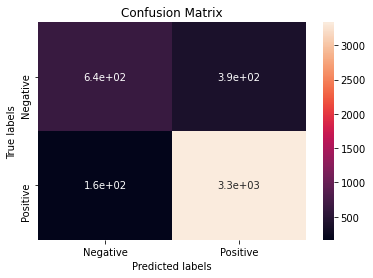

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); 
ax.yaxis.set_ticklabels(['Negative', 'Positive']);

## Test model with given data

In [ ]:
x=["This dress is very good but color is bad"]
def prediction(x):
    X=tfidf.transform(x) 
    pred=logisticRegr.predict(X)
    if pred==0:
      return 'Negative'
    else:
      return 'Positive'
prediction(x)

array(['Negative'], dtype=object)

In [49]:
df['Review Text Precrocessed']=df['Review Text Precrocessed'].astype(str)

## Evaluating Model for 3 Classes using TFIDF and Respective Classifiers

In [78]:
## Calculating TFIDF using sklearn

### Tfidf on preprocessed data

stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

tfidf_3_class = TfidfVectorizer(stop_words=stopwords,ngram_range=(1, 1), use_idf=1, smooth_idf=1, 
                      sublinear_tf=1)
X_3_class = tfidf_3_class.fit_transform(df['Review Text Precrocessed'])
print(X_3_class.shape)


print(df['Label_3C'].value_counts())
print(df['Review Text Precrocessed'].count())

# ## Splitting data

# ### Specify the Label and Features

y_3c=df['Label_3C']
X_3c=X_3_class

print(y_3c.shape)
print(X_3c.shape)

from sklearn import preprocessing
X_scaled = preprocessing.normalize(X_3c, norm='l2').toarray()

X_train_3c, X_test_3c, y_train_3c, y_test_3c = train_test_split(X_scaled ,y_3c ,test_size=.20, random_state=101)

print(df['Label_3C'].value_counts())

(22642, 14084)
Positive    17449
Neutral      2823
Negative     2370
Name: Label_3C, dtype: int64
22642
(22642,)
(22642, 14084)
Positive    17449
Neutral      2823
Negative     2370
Name: Label_3C, dtype: int64


In [ ]:

# print("Build Logistic Regression")
logisticRegr_3c = LogisticRegression(C=2.6867678, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1,
                   max_iter=10000, multi_class='ovr', n_jobs=-1, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=3)
logisticRegr_3c.fit(X_train_3c, y_train_3c)
predictions_3c = logisticRegr_3c.predict(X_test_3c)
score_3c = logisticRegr_3c.score(X_test_3c, y_test_3c)
cm_LR = confusion_matrix(y_test_3c,predictions_3c)
#print(f1_score(y_test_3c,predictions_3c))
print(confusion_matrix(y_test_3c, predictions_3c))
print(classification_report(y_test_3c, predictions_3c)) 
print(accuracy_score(y_test_3c, predictions_3c))




# print("Build random Forest Classifier ")

# clf_3c = RandomForestClassifier()
# clf_3c.fit(X_train_3c, y_train_3c)
# y_pred_3c = clf_3c.predict(X_test_3c)
# cm_RFC=confusion_matrix(y_test_3c, y_pred_3c)
# print(confusion_matrix(y_test_3c, y_pred_3c))
# print(classification_report(y_test_3c, y_pred_3c)) 
# print(accuracy_score(y_test_3c, y_pred_3c))



# print("Build SVM Classifier ")

# clf_3c = SVC()
# clf_3c.fit(X_train_3c, y_train_3c)
# pre_3c=clf.predict(X_test_3c)
# print(confusion_matrix(y_test_3c, pre_3c))
# print(classification_report(y_test_3c, pre_3c)) 
# print(accuracy_score(y_test_3c, pre_3c))




############## Hyperparameter tuning for SVM


#  hyperparameters = [
#     {'kernel': ['rbf'],
#      'gamma': [1,0.1,0.01,0.001,0.0001],
#      'C': [1, 10,100,1000, 10000]}
                   
#     {'kernel': ['linear'],
#      'C': [1, 10,100,1000, 10000]}]     

# clf = GridSearchCV(clf_3c, hyperparameters, cv = 5,verbose=3,refit=2)
# clf.fit(X_train, y_train)
        
# print('Best parameters set found: ')
# print()
# print(clf.best_params_)
# print()
# print(clf.best_estimitor_)       
#         # print('Grid scores in process: ')
#         # print()
#         # means = clf.cv_results_['mean_test_score']
        
#         # for mean, params in zip(means, clf.cv_results_['params']):
#         #     print('%0.3f for %r' % (mean, params))
            
#         # print()
#         # print()
        
#         # print('Detailed Classification Report')
#         # y_pred = clf.predict(X_test)
#         # print(classification_report(y_test, y_pred))
#         # print()
        



############### Hyperparameter tuning for Logistic Regression


# from sklearn.model_selection import GridSearchCV 
# import numpy as np

# # Creating the hyperparameter grid 
# c_space = np.logspace(-5, 8, 10)
# penalty=['l1', 'l2']
# max_iter=[100, 500]
# #C =  c_space



# hyperparameters = dict(penalty=penalty, C = C, max_iter = max_iter)


# # Instantiating logistic regression classifier 
# logreg = LogisticRegression() 
  
# # Instantiating the GridSearchCV object 
# # logreg_cv = GridSearchCV(logreg, hyperparameters, cv = 5) 

# logreg_cv = GridSearchCV(logreg, param_grid, cv = 5) 
  
# clf_LR = logreg_cv.fit(X_train_3c, y_train_3c) 
# LR_3c = clf_LR.predict(X_test_3c)

# print('Best parameters set found: ')
# print()
# print(clf_LR.best_params_)
# print()


# print(clf_LR.best_score_)
# print()


# print(clf_LR.best_estimator_) 
# print() 

# print(confusion_matrix(y_test_3c, LR_3c))
# print(classification_report(y_test_3c, LR_3c)) 
# print(accuracy_score(y_test_3c, LR_3c))





############### Hyperparameter tuning for Random Forest with Randomised Search

# from scipy.stats import randint 
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.model_selection import RandomizedSearchCV 
# from sklearn.model_selection import RepeatedStratifiedKFold
  
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# param_dist = {"max_depth": [10, 12], 
#               "max_features": randint(1, 14085), 
#               "min_samples_leaf": randint(1, 9), 
#               "criterion": ["gini", "entropy"]} 
  
# tree = DecisionTreeClassifier() 
# tree_cv = RandomizedSearchCV(tree, param_dist, cv = cv) 
# tree_fit = tree_cv.fit(X_train_3c, y_train_3c) 
# tree_predict = tree_fit.predict(X_test_3c)

# print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
# print("Best score is {}".format(tree_cv.best_score_)) 

# print(confusion_matrix(y_test_3c, tree_predict))
# print(classification_report(y_test_3c, tree_predict)) 
# print(accuracy_score(y_test_3c, tree_predict))




############### Hyperparameter tuning for Random Forest Grid CV

# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV

# rfc=RandomForestClassifier(random_state=42)

# param_grid = { 
#     'n_estimators': [100,200,300,400,500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# grid_tree =CV_rfc.fit(X_train_3c, y_train_3c)
# grid_predict = grid_tree.predict(X_test_3c)

# print(CV_rfc.best_params_)
# means = CV_rfc.cv_results_['mean_test_score']

# print(confusion_matrix(y_test_3c, grid_predict))
# print(classification_report(y_test_3c, grid_predict)) 
# print(accuracy_score(y_test_3c, grid_predict))


# print('Naive Bayes')
# logisticRegr_3c = GaussianNB()  
# logisticRegr_3c.fit(X_train_3c, y_train_3c)  
# predictions_3c = logisticRegr_3c.predict(X_test_3c)
# score_3c = logisticRegr_3c.score(X_test_3c, y_test_3c)
# cm_LR = confusion_matrix(y_test_3c,predictions_3c)
# print(score_3c)
# print(confusion_matrix(y_test_3c, predictions_3c))
# print(classification_report(y_test_3c, predictions_3c)) 
# print(accuracy_score(y_test_3c, predictions_3c))



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


In [ ]:
x=["This dress is very good but color is bad"]
def prediction(x):
    X=tfidf.transform(x)
    pred=logisticRegr_3c.predict(X)
    return pred
prediction(x)

array(['Neutral'], dtype=object)